# **Data Cleaning**

In [1]:
import pandas as pd

df=pd.read_csv('/content/indian_liver_patient.csv')
pd.set_option('display.max_columns',None)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [3]:
df['Albumin_and_Globulin_Ratio'].isnull().sum()

np.int64(4)

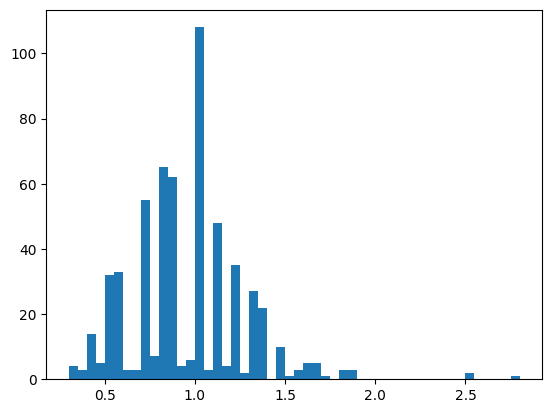

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['Albumin_and_Globulin_Ratio'],bins=50)
plt.show()

In [5]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(),inplace=True)

/tmp/ipython-input-481876730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(),inplace=True)


In [6]:
df['Albumin_and_Globulin_Ratio'].isnull().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(13)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  570 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


# **EDA**

In [ ]:
#univarient Analysis

df['Dataset'].value_counts()

,count
Dataset,
1,406
2,164


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,430
Female,140


In [ ]:
df['Age'].value_counts()

,count
Age,
60,34
45,25
50,23
38,20
32,20
...,...
78,1
11,1
67,1


In [ ]:
#bivarient analysis

df.groupby('Gender')['Dataset'].value_counts()

Gender  Dataset
Female  1           91
        2           49
Male    1          315
        2          115
Name: count, dtype: int64

Age  Dataset
4    2           2
6    2           1
7    1           1
     2           1
8    1           1
                ..
75   1          14
78   1           1
84   2           1
85   2           1
90   1           1
Name: count, Length: 125, dtype: int64

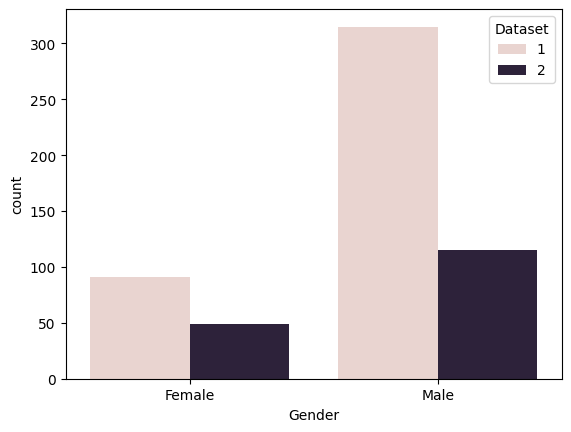

In [ ]:
import seaborn as sns

sns.countplot(x='Gender',hue='Dataset',data=df)
plt.show()

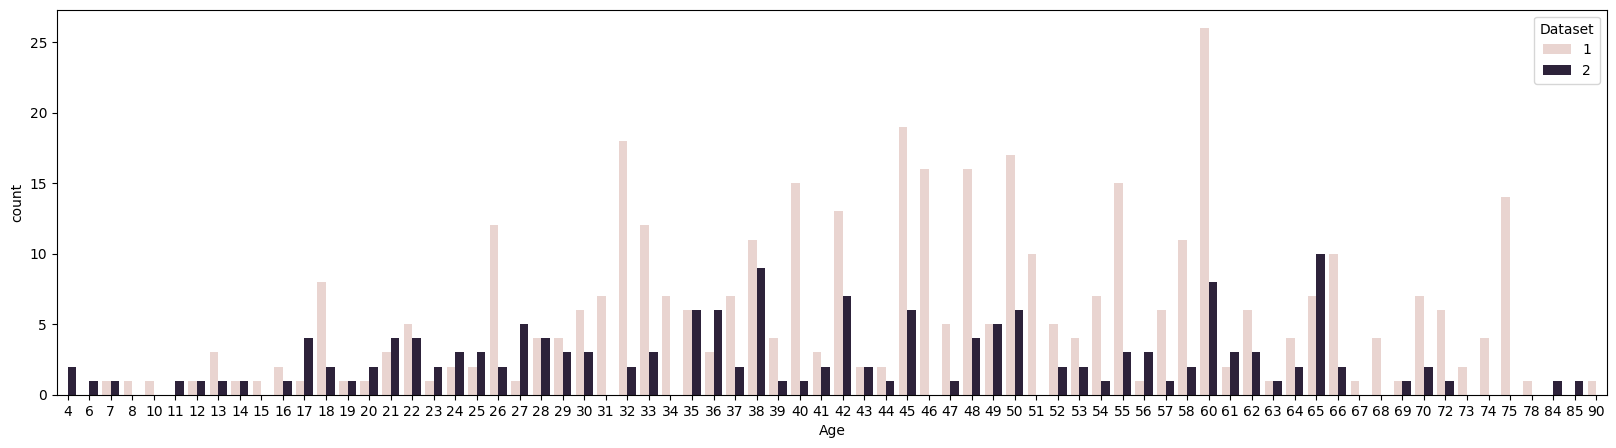

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Age',hue='Dataset',data=df)
plt.show()

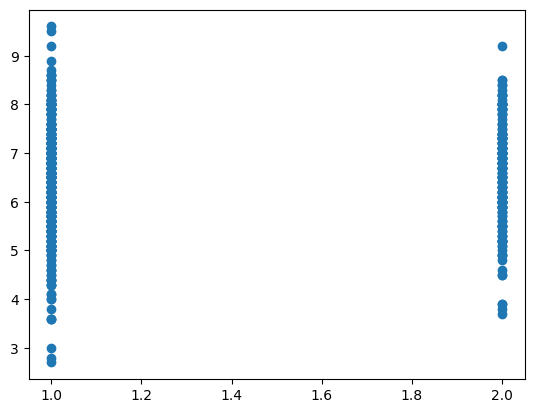

In [ ]:
plt.scatter(y=df['Total_Protiens'],x=df['Dataset'])
plt.show()


In [ ]:
!pip install ydata-profiling -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
report=ProfileReport(df)
report

Output hidden; open in https://colab.research.google.com to view.

# **Data Preprocessing**

### **Encoding**

In [11]:
# I choose label encoder for gender feature i as only 2 categorical values

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [12]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### **Feature Selection**

In [13]:
# I was selected a feature based on correlation with target

df.corrwith(df['Dataset']).sort_values(ascending=False)

,0
Dataset,1.000000
Albumin_and_Globulin_Ratio,0.170345
Albumin,0.166835
Total_Protiens,0.037794
Gender,-0.078501
Age,-0.138093
Aspartate_Aminotransferase,-0.151101
Alamine_Aminotransferase,-0.161917
Alkaline_Phosphotase,-0.187560
Total_Bilirubin,-0.224430


In [14]:
x=df.drop(['Dataset'],axis=1)
y=df['Dataset']

### **Balancing a Data**

In [15]:
y.value_counts()

,count
Dataset,
1,406
2,164


In [16]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [17]:
y.value_counts()

,count
Dataset,
1,406
2,406


In [18]:
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


### **Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_scaled=sc.fit_transform(x)

In [21]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [22]:
x_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.312000,-1.457078,-0.361357,-0.431322,-0.364737,-0.320550,-0.281954,0.284750,0.130609,-0.234583
1,1.128214,0.686305,1.541513,1.785084,2.017809,-0.008432,0.051172,0.962337,-0.000607,-0.778477
2,1.128214,0.686305,0.869912,1.210460,1.045246,-0.034442,-0.078829,0.478346,0.130609,-0.268577
3,0.883167,0.686305,-0.305391,-0.308188,-0.388004,-0.333554,-0.273829,0.284750,0.261826,0.105350
4,1.740833,0.686305,0.235622,0.348525,-0.327509,-0.249023,-0.115391,0.768741,-1.050338,-1.934252


In [23]:
y=y.map({1:0,2:1})

In [24]:
y.value_counts()

,count
Dataset,
0,406
1,406


# **Finding Best Model**

**Logistic Regression**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

best_score=0
for i in range(43):
  x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
  lr=LogisticRegression()
  lr.fit(x_train,y_train)

  auc_score=roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])

  if auc_score > best_score:
      best_score=auc_score
      best_rs=i
print(f'ran:{best_rs},auc_score:{best_score}')

ran:28,auc_score:0.8517345399698342


**Evaluation metrics**

Accuracy Score: 0.7791411042944786
Precision Score: 0.71
Recall Score: 0.9102564102564102
F1 Score: 0.797752808988764
Confusion Matrix: 
[[56 29]
 [ 7 71]]
AUC: 0.8520361990950227


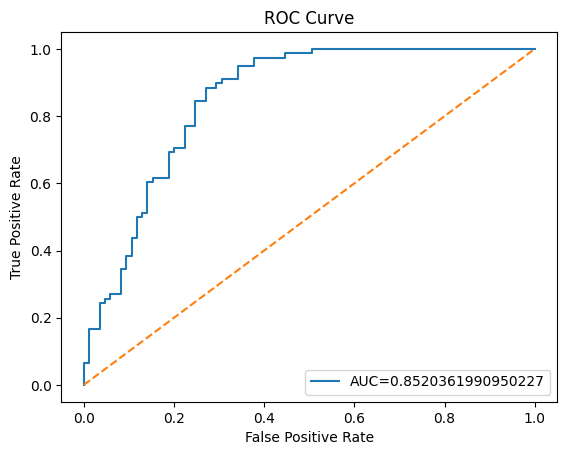

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=28)

cm=confusion_matrix(y_test,lr.predict(x_test))
ac=accuracy_score(y_test,lr.predict(x_test))
pr=precision_score(y_test,lr.predict(x_test))
re=recall_score(y_test,lr.predict(x_test))
f1=f1_score(y_test,lr.predict(x_test))
auc=roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=lr.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Desicion Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier

best_score=0
for i in range(0,43):
  x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
  dt=DecisionTreeClassifier(max_depth=10)
  dt.fit(x_train,y_train)

  auc_score=roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])

  if auc_score > best_score:
      best_score=auc_score
      best_rs=i


print(f'ran:{best_rs},auc_score:{best_score}')

ran:26,auc_score:0.8267028330319469


**Evaluation metrics**

Accuracy Score: 0.901840490797546
Precision Score: 0.8705882352941177
Recall Score: 0.9367088607594937
F1 Score: 0.9024390243902439
Confusion Matrix: 
[[73 11]
 [ 5 74]]
AUC: 0.929098854731766


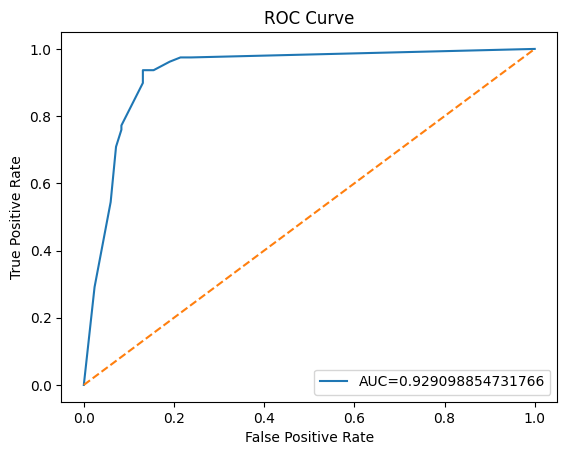

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=best_rs)

cm=confusion_matrix(y_test,dt.predict(x_test))
ac=accuracy_score(y_test,dt.predict(x_test))
pr=precision_score(y_test,dt.predict(x_test))
re=recall_score(y_test,dt.predict(x_test))
f1=f1_score(y_test,dt.predict(x_test))
auc=roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=dt.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**KNN**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

best_score=0
for i in range(0,43):
  x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
  knn=KNeighborsClassifier(n_neighbors=28,weights='distance')
  knn.fit(x_train,y_train)
  knn.predict_proba(x_test)[:,1]
  auc_score=roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])

  if auc_score > best_score:
      best_score=auc_score
      best_rs=i
print(f'ran:{best_rs},auc_score:{best_score}')

ran:41,auc_score:0.8363499245852187


Accuracy Score: 0.7607361963190185
Precision Score: 0.7017543859649122
Recall Score: 0.9411764705882353
F1 Score: 0.8040201005025126
Confusion Matrix: 
[[44 34]
 [ 5 80]]
AUC: 0.8363499245852187


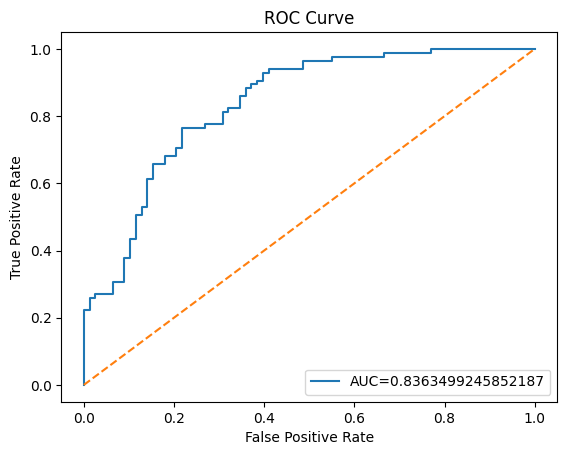

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=41)
knn=KNeighborsClassifier(n_neighbors=28,weights='distance')
knn.fit(x_train,y_train)

cm=confusion_matrix(y_test,knn.predict(x_test))
ac=accuracy_score(y_test,knn.predict(x_test))
pr=precision_score(y_test,knn.predict(x_test))
re=recall_score(y_test,knn.predict(x_test))
f1=f1_score(y_test,knn.predict(x_test))
auc=roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Ensemble(Bagging|Boosting)**

**Random Forest**

ran:35,Acurracy:0.9998489882210813
Accuracy Score: 0.9570552147239264
Precision Score: 0.9666666666666667
Recall Score: 0.9560439560439561
F1 Score: 0.9613259668508287
Confusion Matrix: 
[[69  3]
 [ 4 87]]
AUC: 0.9863400488400488


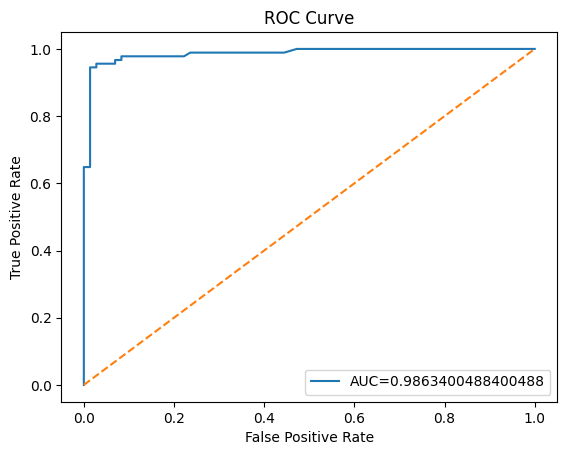

In [39]:
# i choose random forest the error metrics are looking good

from sklearn.ensemble import RandomForestClassifier

best_score=0
for i in range(0,43):
  x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
  rd=RandomForestClassifier(max_depth=15)
  rd.fit(x_train,y_train)
  auc_score=roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])

  if auc_score > best_score:
      best_score=auc_score
      best_rs=i
      best_model_rd=rd

print(f'ran:{best_rs},Acurracy:{best_score}')

cm=confusion_matrix(y_test,best_model_rd.predict(x_test))
ac=accuracy_score(y_test,best_model_rd.predict(x_test))
pr=precision_score(y_test,best_model_rd.predict(x_test))
re=recall_score(y_test,best_model_rd.predict(x_test))
f1=f1_score(y_test,best_model_rd.predict(x_test))
auc=roc_auc_score(y_test,best_model_rd.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=best_model_rd.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Saving the Model**

In [41]:
import pickle

pickle.dump(le,open('encoder_3.pkl','wb'))

In [42]:
pickle.dump(sc,open('scaler_3.pkl','wb'))

In [43]:
pickle.dump(best_model_rd,open('model_3.pkl','wb'))

In [ ]:
rse=pickle.load(open('model_3_2.pkl','rb'))

In [34]:
#x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=33)
# rd=RandomForestClassifier(max_depth=10)
# rd.fit(x_train,y_train)

cm=confusion_matrix(y_test,rse.predict(x_test))
ac=accuracy_score(y_test,rse.predict(x_test))
pr=precision_score(y_test,rse.predict(x_test))
re=recall_score(y_test,rse.predict(x_test))
f1=f1_score(y_test,rse.predict(x_test))
auc=roc_auc_score(y_test,rse.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=rse.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

NameError: name 'rse' is not defined